# 1. Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 2. 	Softmax Regression,	or	Multinomial	Logistic	Regression

The	Logistic	Regression	model	can	be	generalized	to	support	multiple	classes	directly,	without	having	to
train	and	combine	multiple	binary	classifiers.	This	is	called	Softmax
Regression,	or	Multinomial	Logistic	Regression.

The	idea	is	quite	simple:	when	given	an	instance	x,	the	Softmax	Regression	model	first	computes	a	score
s k (x)	for	each	class	k,	then	estimates	the	probability	of	each	class	by	applying	the	softmax	function	(also
called	the	normalized	exponential)	to	the	scores.	The	equation	to	compute	s k (x)	should	look	familiar,	as
it	is	just	like	the	equation	for	Linear	Regression	prediction	(see	Equation	4-19).

![title, width=10, height=5](../tutorial/Selection_017.png) 

Note	that	each	class	has	its	own	dedicated	parameter	vector	θ k .	All	these	vectors	are	typically	stored	as
rows	in	a	parameter	matrix	Θ.

Once	you	have	computed	the	score	of	every	class	for	the	instance	x,	you	can	estimate	the	probability	 k
that	the	instance	belongs	to	class	k	by	running	the	scores	through	the	softmax	function	(Equation	4-20):	it
computes	the	exponential	of	every	score,	then	normalizes	them	(dividing	by	the	sum	of	all	the
exponentials).

![title, width=10, height=5](../tutorial/Selection_018.png) 

K	is	the	number	of	classes.

s(x)	is	a	vector	containing	the	scores	of	each	class	for	the	instance	x.

σ(s(x)) k 	is	the	estimated	probability	that	the	instance	x	belongs	to	class	k	given	the	scores	of	each
class	for	that	instance.

Just	like	the	Logistic	Regression	classifier,	the	Softmax	Regression	classifier	predicts	the	class	with	the
highest	estimated	probability	(which	is	simply	the	class	with	the	highest	score),	as	shown	in	Equation	4-
21.

![title, width=10, height=5](../tutorial/Selection_019.png) 

The	argmax	operator	returns	the	value	of	a	variable	that	maximizes	a	function.	In	this	equation,	it
returns	the	value	of	k	that	maximizes	the	estimated	probability	σ(s(x)) k .

The	Softmax	Regression	classifier	predicts	only	one	class	at	a	time	(i.e.,	it	is	multiclass,	not	multioutput)	so	it	should	be	used	only
with	mutually	exclusive	classes	such	as	different	types	of	plants.	

# 2.2 Training 

Now	that	you	know	how	the	model	estimates	probabilities	and	makes	predictions,	let’s	take	a	look	at
training.	The	objective	is	to	have	a	model	that	estimates	a	high	probability	for	the	target	class	(and
consequently	a	low	probability	for	the	other	classes).	Minimizing	the	cost	function	shown	in	Equation	4-
22,	called	the	cross	entropy,	should	lead	to	this	objective	because	it	penalizes	the	model	when	it
estimates	a	low	probability	for	a	target	class.	Cross	entropy	is	frequently	used	to	measure	how	well	a	set
of	estimated	class	probabilities	match	the	target	classes	

![title, width=10, height=5](../tutorial/Selection_020.png) 

![title, width=10, height=5](../tutorial/Selection_022.png) is	equal	to	1	if	the	target	class	for	the	i th 	instance	is	k;	otherwise,	it	is	equal	to	0. 

Notice	that	when	there	are	just	two	classes	(K	=	2),	this	cost	function	is	equivalent	to	the	Logistic
Regression’s	cost	function

The	gradient	vector	of	this	cost	function	with	regards	to	θ k 	is	given	by	Equation	4-23:

![title, width=10, height=5](../tutorial/Selection_021.png) 

Now	you	can	compute	the	gradient	vector	for	every	class,	then	use	Gradient	Descent	(or	any	other
optimization	algorithm)	to	find	the	parameter	matrix	Θ	that	minimizes	the	cost	function.

Let’s	use	Softmax	Regression	to	classify	the	iris	flowers	into	all	three	classes.	Scikit-Learn’s
LogisticRegression 	uses	one-versus-all	by	default	when	you	train	it	on	more	than	two	classes,	but	you
can	set	the	 multi_class 	hyperparameter	to	 "multinomial" 	to	switch	it	to	Softmax	Regression	instead.
You	must	also	specify	a	solver	that	supports	Softmax	Regression,	such	as	the	 "lbfgs" 	solver	(see	Scikit-
Learn’s	documentation	for	more	details).	It	also	applies	l 2 	regularization	by	default,	which	you	can
control	using	the	hyperparameter	 C .

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'target', 'target_names', 'data', 'feature_names']

In [3]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

print(X[1:5, :])
print(y)

[[ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

So	the	next	time	you	find	an	iris	with	5	cm	long	and	2	cm	wide	petals,	you	can	ask	your	model	to	tell	you
what	type	of	iris	it	is,	and	it	will	answer	Iris-Virginica	(class	2)	with	94.2%	probability	(or	Iris-
Versicolor	with	5.8%	probability):

In [5]:
softmax_reg.predict([[5,2]])

array([2])

In [6]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134078e-07,   5.75276067e-02,   9.42471760e-01]])

Let's plot the decision boundaries on X_new features

In [7]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


In [8]:
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)


In [9]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)


/home/chinchu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/chinchu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


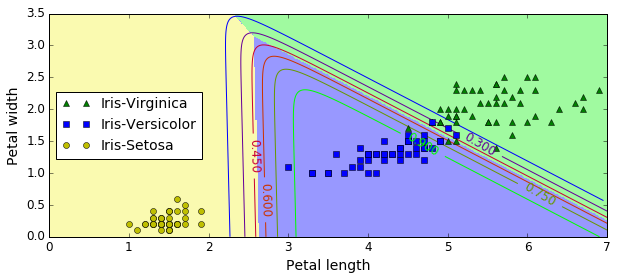

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Figure shows	the	resulting	decision	boundaries,	represented	by	the	background	colors.	Notice	that
the	decision	boundaries	between	any	two	classes	are	linear.	The	figure	also	shows	the	probabilities	for
the	Iris-Versicolor	class,	represented	by	the	curved	lines	(e.g.,	the	line	labeled	with	0.450	represents	the
45%	probability	boundary).	Notice	that	the	model	can	predict	a	class	that	has	an	estimated	probability
below	50%.	For	example,	at	the	point	where	all	decision	boundaries	meet,	all	classes	have	an	equal
estimated	probability	of	33%.